In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import du fichier CSV
pd.read_csv ("./names/yob1880.csv")

,Mary,F,7065
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578
...,...,...,...
1994,Woodie,M,5
1995,Worthy,M,5
1996,Wright,M,5
1997,York,M,5


In [6]:
# rename columns
names1880 = pd.read_csv("./names/yob1880.csv", header=None, names=["name", "sex", "birth"])
names1880

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [7]:
#step 2 
births_by_sex = names1880.groupby('sex')['birth'].sum()
print (births_by_sex)


sex
F     90994
M    110490
Name: birth, dtype: int64


In [10]:
#step 3
columns = ['name', 'sex', 'birth']
yobs = []

for year in range(1880, 2019):
    path = f"./names/yob{year}.txt"
    df = pd.read_csv(path, names=columns)
    df['year'] = year
    yobs.append(df)

names = pd.concat(yobs, ignore_index=True)
names.head()

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [12]:
# step 4
total_births = names.pivot_table(values='birth', index='year', columns='sex', aggfunc=sum)

total_births.head()

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112319,104625
1884,129019,114442


In [13]:
#step 5
names.groupby(['year', 'sex']).sum()
names.head()

C:\Users\layla\AppData\Local\Temp\ipykernel_12384\1019536953.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  names.groupby(['year', 'sex']).sum()


,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


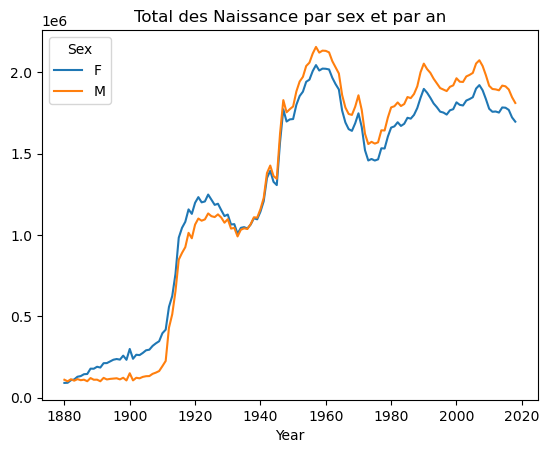

In [14]:
#step 6
total_births.plot(title="Total des Naissance par sex et par an")
plt.xlabel("Year")
plt.legend(title="Sex");

In [16]:
#step 7
def get_counts(group):
    births = group.birth.astype(float)
    group['prop'] = births / births.sum()
    
    return group

names = names.groupby(['year', 'sex']).apply(get_counts)
names.head()

C:\Users\layla\AppData\Local\Temp\ipykernel_12384\2459112558.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  names = names.groupby(['year', 'sex']).apply(get_counts)


,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [17]:
# 7 Vérification 
np.allclose( names.groupby(['year', 'sex']).prop.sum(), 1 )

True

In [18]:
#step 8
def get_top1000(group):
        return group.sort_values(by=['birth'], ascending=False)[:1000]
    
top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000.drop(columns=['year', 'sex'], inplace=True)
top1000.head()

name  birth      prop
year sex                              
1880 F   0       Mary   7065  0.077642
         1       Anna   2604  0.028617
         2       Emma   2003  0.022012
         3  Elizabeth   1939  0.021309
         4     Minnie   1746  0.019188

In [19]:
#step 9

top1000.loc[1880, :].sort_values(by='birth', ascending=False)[:1]

,,name,birth,prop
sex,,,,
M,942,John,9655,0.087383


In [20]:
#step 10 

total_births_top1000 = top1000.pivot_table(values='birth', index='year', columns='name', aggfunc=sum)

total_births_top1000 = total_births_top1000[['John', 'Harry', 'Mary', 'Marilyn']]

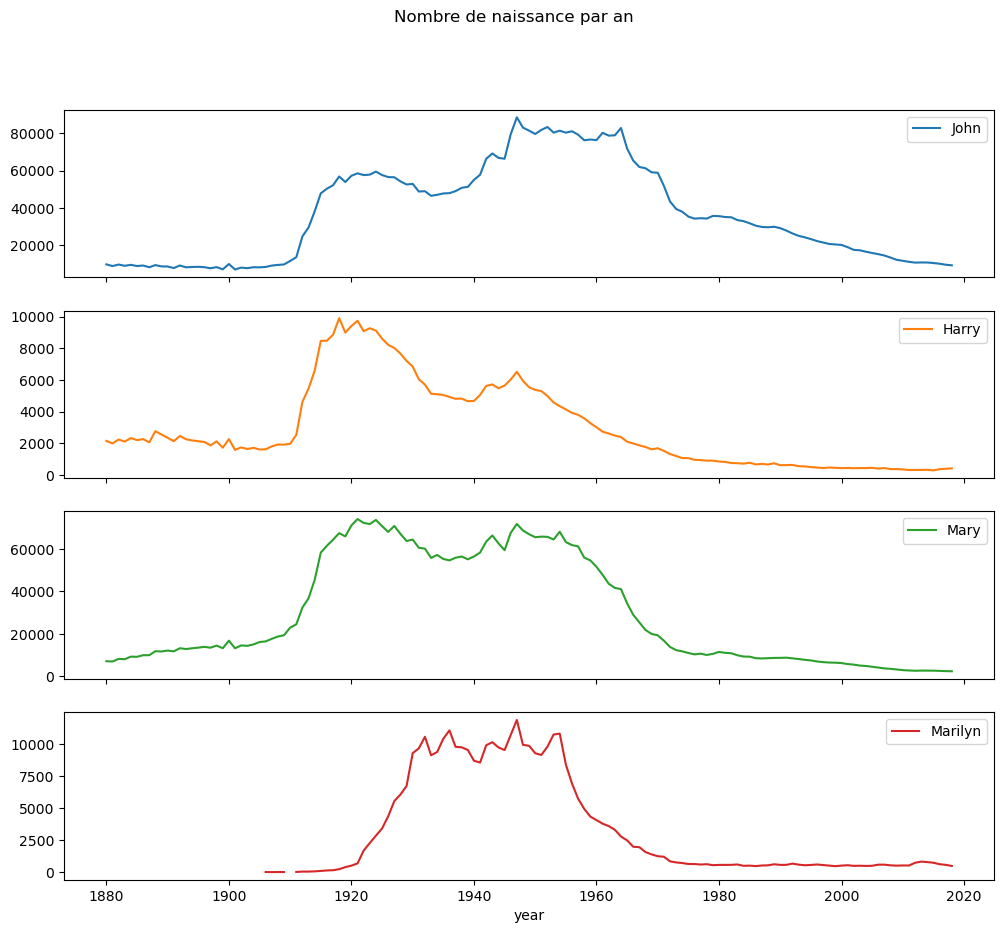

In [21]:
total_births_top1000.plot(subplots=True, figsize=(12,10), grid=False, title="Nombre de naissance par an");

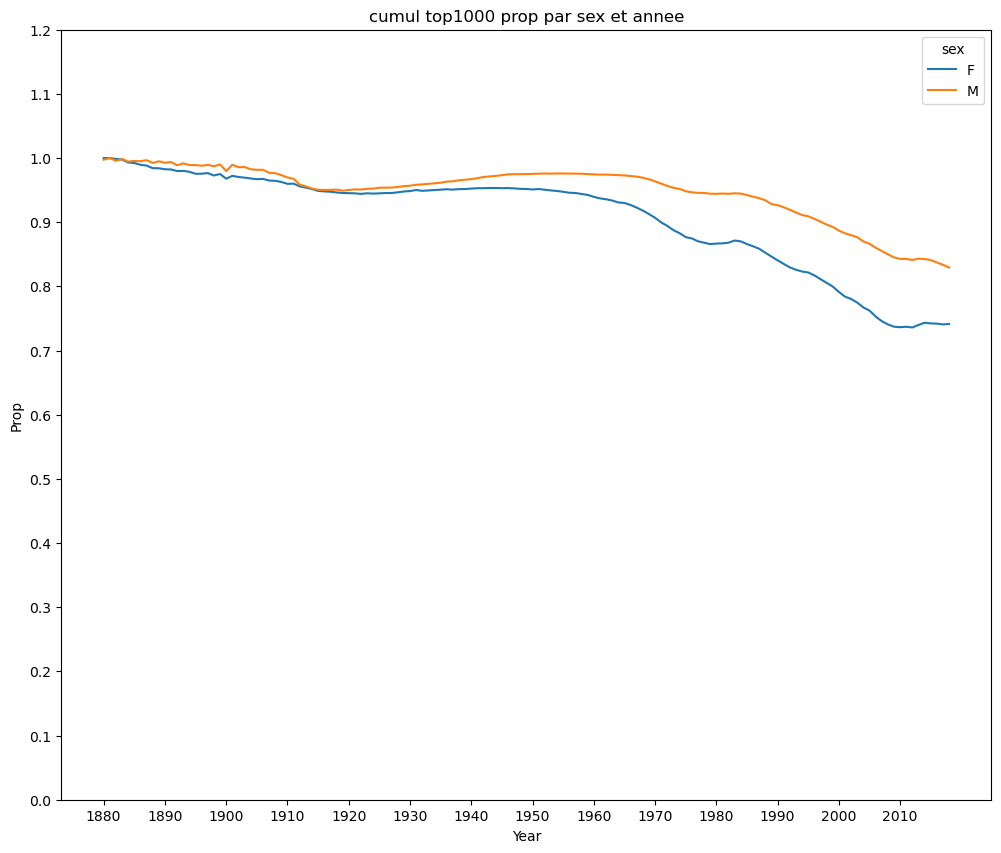

In [22]:
ste
total_births_top1000_mesure = top1000.pivot_table(values='prop', index='year', columns='sex', aggfunc=sum)

# Il semble que les prénoms dans les Top1000 est en baisse ce qui signifie une plus grande diversité dans l'attribution
# des prénoms

total_births_top1000_mesure.plot(
    title="cumul top1000 prop par sex et annee",
    yticks=np.linspace(0, 1.2, 13),
    xticks=range(1880, 2020, 10), 
    figsize = (12, 10)
)
plt.xlabel('Year')
plt.ylabel('Prop');

